In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

['DESCRIPTION:_At Ease Slate Tunic', 'DESCRIPTION:_Basically Perfect V-Neck In Burgundy', 'DESCRIPTION:_Basically Perfect V-Neck In Golden Bronze', 'DESCRIPTION:_Blue Ombra bow tie', 'DESCRIPTION:_Born To Fashion Dress Mauve  Ivory', 'DESCRIPTION:_Brushed Melange V-Neck Sweater In Hunter Green', 'DESCRIPTION:_Creature Comforts Tunic In Forrest Green', 'DESCRIPTION:_Dip Dye Red Ombre Top', 'DESCRIPTION:_Fade Away Ombre Sports Bra', 'DESCRIPTION:_Falling Sleeves Embroidered Blouse', 'DESCRIPTION:_Honeysuckle Shirred Tunic', 'DESCRIPTION:_Hooded Camp Vest In Burgundy', "DESCRIPTION:_I'm Full of Holiday Spirit (Its Called Vodka)", 'DESCRIPTION:_Lace Panel Off The Shoulder Top', 'DESCRIPTION:_Lacy Elegance Off-White Blouse', "DESCRIPTION:_Let's Layer In Black", "DESCRIPTION:_Let's Layer In White", 'DESCRIPTION:_MAVERICK ---MENS NAVY CREW', 'DESCRIPTION:_PREORDER: Moose Fashion Show Graphic Tee', 'DESCRIPTION:_Pretty Blush Top', 'DESCRIPTION:_Pretty In Pink Leopard Print Halter', 'DESCRIPTIO

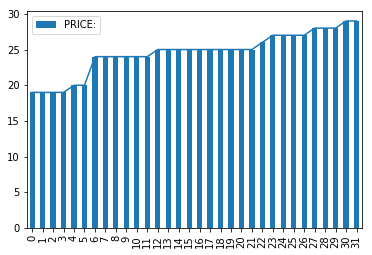

In [116]:
def read_data(data):
    data = pd.read_csv(data)
    unname = 'Unnamed: 0'
    data = data.drop(unname,axis=1)
    data = data.fillna(0.0)
    features = [f for f in list(data) if "DESCRIPTION:_" in f]
    print(features)
    data[['PRICE:']].plot.bar()
    X = data[['PRICE:']]
    print(X.describe())
    y = data.drop(['PRICE:'],axis=1)
    plt.plot(X)
    plt.show()
    plt.close()
    return data,X,y
tops = read_data('price_data/combined_data/tops_combined.csv')

['DESCRIPTION:_Angle of Destruction Skinny Jeans', 'DESCRIPTION:_Basic Black Skinny Jeans', 'DESCRIPTION:_Black Criss Cross Romper', 'DESCRIPTION:_Black Mamba Snakeskin Leggings', 'DESCRIPTION:_Blue For You Skinnies', 'DESCRIPTION:_Business Casual Pinstriped Shorts', 'DESCRIPTION:_Camouflage Jumpsuit', 'DESCRIPTION:_Casual  Cozy Chenille Pants', 'DESCRIPTION:_Clarissa Cropped Trousers', 'DESCRIPTION:_Cropped Wide Leg Jumpsuit', 'DESCRIPTION:_Distressed Dark Gray Modern Moto Jeans', 'DESCRIPTION:_Fade Away Ombre Athletic Leggings', 'DESCRIPTION:_Fall Fantasy Striped Romper', 'DESCRIPTION:_Fleece Lined Leggings In Burgundy', 'DESCRIPTION:_Fleece Lined Leggings In Olive', 'DESCRIPTION:_Flutter Sleeve Blush Romper', 'DESCRIPTION:_Great Lengths Cuffed Girlfriend Jeans', 'DESCRIPTION:_Josie Black Jumpsuit', 'DESCRIPTION:_Jump For Joy Navy Jumpsuit', 'DESCRIPTION:_Let The Animal Out Jeans', 'DESCRIPTION:_Lounge Around Town Joggers In Light Gray', 'DESCRIPTION:_Preppy Pinstriped Jumpsuit', 'DE

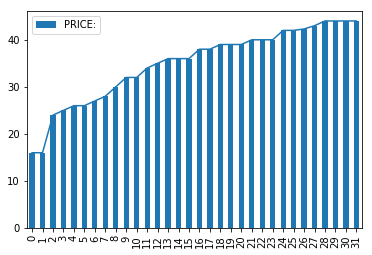

In [117]:
bottoms= read_data('price_data/combined_data/bottoms_combined.csv')

['DESCRIPTION:_Belted Corduroy Paper Bag Skirt', 'DESCRIPTION:_Black, White  Red Hot All Over Dress', 'DESCRIPTION:_Button Up Asymmetrical Hem Dress', 'DESCRIPTION:_Chillax Summer Maxi In Magenta', 'DESCRIPTION:_Chillax Summer Maxi In Royal Blue', 'DESCRIPTION:_Chillax Summer Maxi In Sage', "DESCRIPTION:_Fallin' For Stripes Shirt Dress", 'DESCRIPTION:_Fun  Flirty Dress In Black', 'DESCRIPTION:_Golden Girl Smocked Neck Dress', 'DESCRIPTION:_Hot & Bothered Pencil Skirt', "DESCRIPTION:_It's A Thermal Wrap Dress", 'DESCRIPTION:_Last Blooms Of Summer Dress', "DESCRIPTION:_Let's Layer In Black", "DESCRIPTION:_Let's Layer In White", 'DESCRIPTION:_Look Like Royalty Dress In Black', 'DESCRIPTION:_Lovely Lace Overlay Dress In Black', 'DESCRIPTION:_Minty Leopard Print Maxi', 'DESCRIPTION:_Peacock Double Ruffle V-Neck Dress', 'DESCRIPTION:_Play The Day Away Maxi In Black', 'DESCRIPTION:_Princess Sparkle', 'DESCRIPTION:_Sailing Through Summer Striped Dress', 'DESCRIPTION:_Sassy Striped T-Shirt Dres

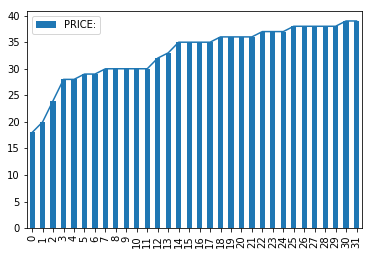

In [118]:
dresses = read_data('price_data/combined_data/dresses_joined.csv')

['DESCRIPTION:_Artsy Crocheted Cardi In Gray', 'DESCRIPTION:_Artsy Crocheted Cardi In Ivory', 'DESCRIPTION:_Aztec Print Sherpa Vest', 'DESCRIPTION:_Blank Check Plaid Poncho', 'DESCRIPTION:_Courtney Corduroy Vest', 'DESCRIPTION:_Deep Sea Cardigan', 'DESCRIPTION:_Denim Dress/Duster', 'DESCRIPTION:_Diamond In the Rough Vest In Black', "DESCRIPTION:_Farmer's Market Two-Tone Cardi In Gray", 'DESCRIPTION:_Fatih -Terry Fleece Hoodie', 'DESCRIPTION:_Football Babe Hoodie', 'DESCRIPTION:_Fur-Ever Young Slouchy Cable Knit Cardigan', 'DESCRIPTION:_Head Honcho Poncho Top', 'DESCRIPTION:_Hooded Camp Vest In Burgundy', 'DESCRIPTION:_Ivory Tower Cardigan', 'DESCRIPTION:_Make The Grade Fringed Poncho', 'DESCRIPTION:_Mustard  Camo Angled Zip Hoodie', 'DESCRIPTION:_Oversized Knit Moto Jacket', 'DESCRIPTION:_Peachy Hoodie', 'DESCRIPTION:_Pocketed Popcorn Cardigan In Honey', 'DESCRIPTION:_Relaxed Rust Hoodie', 'DESCRIPTION:_Ribbed Rose Cardigan', 'DESCRIPTION:_Royal Treatment Cardigan', 'DESCRIPTION:_Seren

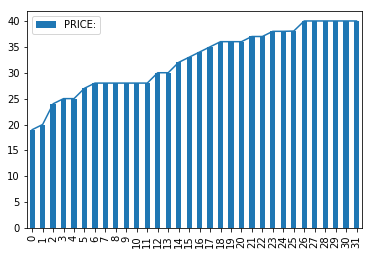

In [119]:
cardigans = read_data('price_data/combined_data/cardigans_combined.csv')

['DESCRIPTION:_Adorned And Delighted Scarf', 'DESCRIPTION:_Holidays With A Twist Dress', 'DESCRIPTION:_Hot & Bothered Pencil Skirt', 'DESCRIPTION:_Moondrop Necklace', 'DESCRIPTION:_Tears Of Gold Earrings']
          PRICE:
count   5.000000
mean   25.400000
std     8.532292
min    18.000000
25%    20.000000
50%    20.000000
75%    32.000000
max    37.000000


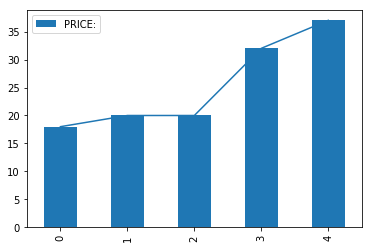

In [120]:
holiday_dress = read_data('price_data/combined_data/combined_holiday_dresses.csv')

['DESCRIPTION:_Blue Velvet Mock Neck Top', 'DESCRIPTION:_Confetti Beaded Earrings In Black', 'DESCRIPTION:_Eyelets  Fringe Blush Scarf', 'DESCRIPTION:_Grace Mock Neck Blouse In Black', 'DESCRIPTION:_Hot & Bothered Pencil Skirt', 'DESCRIPTION:_Maxed Out Black Maxi Dress', 'DESCRIPTION:_Onyx Opulence Sequined Dress', 'DESCRIPTION:_Scalloped Lace Overlay Dress', 'DESCRIPTION:_Sequence Of Sequins Pencil Skirt', 'DESCRIPTION:_Silky Satin Cami In Cayenne', 'DESCRIPTION:_Tiny Dots Pencil Skirt', 'DESCRIPTION:_Velvet Chevron Crossbody Clutch In Fuchsia', 'DESCRIPTION:_Versatile Elegance Black Maxi Dress']
          PRICE:
count  13.000000
mean   35.384615
std    10.836193
min    12.000000
25%    30.000000
50%    37.000000
75%    42.000000
max    54.000000


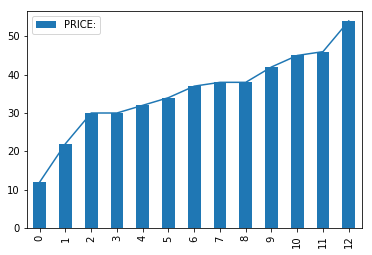

In [121]:
holiday_beanie = read_data('price_data/combined_data/holiday_beanie_.csv')

['DESCRIPTION:_Berry', 'DESCRIPTION:_Bravo', 'DESCRIPTION:_Candy Cane', 'DESCRIPTION:_Caramel Apple', 'DESCRIPTION:_Caramel Apple Diamond', 'DESCRIPTION:_Cocoa', 'DESCRIPTION:_Currant', 'DESCRIPTION:_Dark Pink', 'DESCRIPTION:_Fire N Ice', 'DESCRIPTION:_Fleur De Lisa', 'DESCRIPTION:_Giddy UP', 'DESCRIPTION:_Girlfriend', 'DESCRIPTION:_Glam Doll', 'DESCRIPTION:_Hazelnut', 'DESCRIPTION:_Heartbreaker', 'DESCRIPTION:_Honey Rose', 'DESCRIPTION:_Hurricane Red', 'DESCRIPTION:_Lilac Lac', 'DESCRIPTION:_Mauve Ice', 'DESCRIPTION:_Mulled Wine', 'DESCRIPTION:_Pomagranite', 'DESCRIPTION:_Pop Art Pink', 'DESCRIPTION:_Purple Reign', 'DESCRIPTION:_Razzberry', 'DESCRIPTION:_Roseberry', 'DESCRIPTION:_Sheer Beery', 'DESCRIPTION:_Strawberry Shortcake', 'DESCRIPTION:_Summer Sunset', 'DESCRIPTION:_Violette', 'DESCRIPTION:_skyline', 'DESCRIPTION:_summer fun']
       PRICE:
count    31.0
mean     20.0
std       0.0
min      20.0
25%      20.0
50%      20.0
75%      20.0
max      20.0


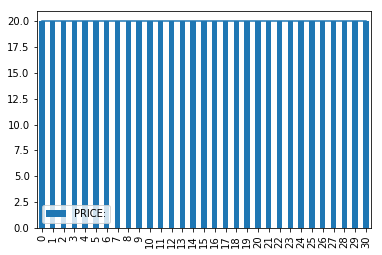

In [122]:
lipscence = read_data('price_data/combined_data/lipscence_joined.csv')

['DESCRIPTION:_America Yall', 'DESCRIPTION:_Basic Witch Graphic Tee', 'DESCRIPTION:_Buffalo Plaid Buffalo Tee', 'DESCRIPTION:_Cactus Tshirt', 'DESCRIPTION:_Coffee and Ducktape', 'DESCRIPTION:_Drink Up Grinches', 'DESCRIPTION:_Forever your Biggest Fan', 'DESCRIPTION:_GOOSE - MENS - Heather Navy Tshirt', 'DESCRIPTION:_Game Day Graphic Tee', 'DESCRIPTION:_Goose - Heather Grey  Womens T-Shirt', 'DESCRIPTION:_Grateful Thankful Blessed Tee', 'DESCRIPTION:_I Said Yes', "DESCRIPTION:_I'm Full of Holiday Spirit (Its Called Vodka)", "DESCRIPTION:_I'm Here For The Boos Graphic Tee", 'DESCRIPTION:_Irish Today', 'DESCRIPTION:_Less Talky More Coffee Tee', "DESCRIPTION:_Let's Do Brunch Embroidered Tee", 'DESCRIPTION:_Lets Make Fireworks', 'DESCRIPTION:_Maverick -- Womens Navy T-Shirt', 'DESCRIPTION:_PREORDER: Moose Fashion Show Graphic Tee', 'DESCRIPTION:_PREORDER: Reindeer Gather Here Graphic Tee', "DESCRIPTION:_PREORDER: Santa's Team Graphic Tee", 'DESCRIPTION:_Tailgates And Touchdowns Graphic Tee'

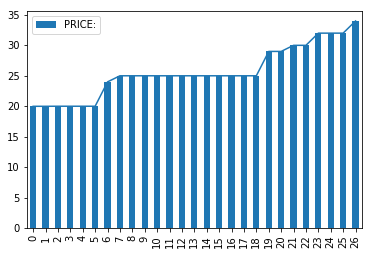

In [123]:
graphic_t = read_data('price_data/combined_data/graphic_tee.csv')

['DESCRIPTION:_At Ease Slate Tunic', 'DESCRIPTION:_Basically Perfect V-Neck In Burgundy', 'DESCRIPTION:_Basically Perfect V-Neck In Golden Bronze', 'DESCRIPTION:_Black Mamba Snakeskin Leggings', 'DESCRIPTION:_Born To Fashion Dress Mauve  Ivory', 'DESCRIPTION:_Brushed Melange V-Neck Sweater In Hunter Green', 'DESCRIPTION:_Cactus Tshirt', 'DESCRIPTION:_Coffee and Ducktape', 'DESCRIPTION:_Drink Up Grinches', 'DESCRIPTION:_Fall Fantasy Striped Romper', 'DESCRIPTION:_Fleece Lined Leggings In Burgundy', 'DESCRIPTION:_Fleece Lined Leggings In Olive', 'DESCRIPTION:_Forever your Biggest Fan', 'DESCRIPTION:_I Said Yes', 'DESCRIPTION:_Irish Today', 'DESCRIPTION:_Jump For Joy Navy Jumpsuit', 'DESCRIPTION:_Less Talky More Coffee Tee', "DESCRIPTION:_Let's Layer In Black", 'DESCRIPTION:_Lets Make Fireworks', 'DESCRIPTION:_Look Like Royalty Dress In Black', 'DESCRIPTION:_Make The Grade Fringed Poncho', 'DESCRIPTION:_Maverick -- Womens Navy T-Shirt', 'DESCRIPTION:_PREORDER: Moose Fashion Show Graphic T

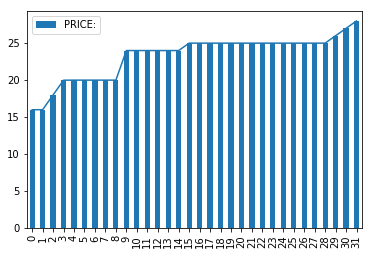

In [124]:
plus = read_data('price_data/combined_data/plus_combined.csv')

['DESCRIPTION:_Adorned And Delighted Scarf', 'DESCRIPTION:_Better Than Donuts Tortoise Earrings', 'DESCRIPTION:_Camo C.C Beanie', 'DESCRIPTION:_Camo Pom Pom C.C Beanie', 'DESCRIPTION:_Confetti Beaded Earrings', 'DESCRIPTION:_Confetti Beaded Earrings In Black', 'DESCRIPTION:_Confetti Beaded Earrings In Tomato Red', 'DESCRIPTION:_Cork Chevron Pendant Necklace', "DESCRIPTION:_Don't Leave Me Earrings In Mustard", 'DESCRIPTION:_Double Time Black Sandals', 'DESCRIPTION:_Druzy Adjustable Ring In Magenta', 'DESCRIPTION:_Fall And Beyond Infinity Scarf In Camel', 'DESCRIPTION:_Fall And Beyond Infinity Scarf In Navy', 'DESCRIPTION:_Leather & Lace', 'DESCRIPTION:_Long Striped Tying Scrunchie', 'DESCRIPTION:_Love Rose Gold Bracelet', 'DESCRIPTION:_Mad For Plaid Blanket Scarf In Wine  Sage', 'DESCRIPTION:_Nacho Basic Scarf In Camel', 'DESCRIPTION:_Nacho Basic Scarf In Fuchsia', 'DESCRIPTION:_No Slouch Burgundy Beanie', 'DESCRIPTION:_Prairie Sun', 'DESCRIPTION:_Rhinestone Helmet Earrings', 'DESCRIPTI

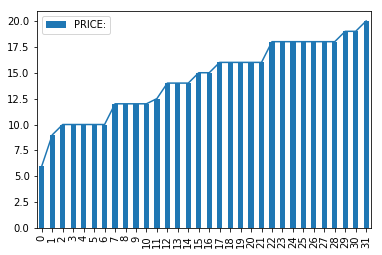

In [125]:
shoes_acc = read_data('price_data/combined_data/shoes_accesories_joined.csv')

INVESTED IN EACH OF THE 10 CATEGORIES $600.00
UNUSED FUNDS: 5400
IF I PAY $20.00 PER ITEM , AND MY STARTING INVESTMENT IS: $6000.00 
WITH AN INVENTORY OF: 20 ITEMS AT AN AVERAGE PRICE OF $24.00
WE WILL WANT A PROFIT TARGET OF: $311.54 BIWEEKLY FOR A 1.5 PERCENT RETURN, 
MY RETURNS WILL BE: $0.06 PER DOLLAR 
WHILE THE ITEM WILL HAVE A NEW PRICE OF: $21.38 
WITH A PRICE RANGE OF: $2.62
OPTIMAL PRICE: $21.38
THE CUSTOMER BOUGHT 20 ITEMS
SINCE THE CUSTOMER BOUGHT THIS AMOUNT OF ITEMS YOU ARE $116.15 ABOVE THE PROFIT TARGET
CONGRATULATIONS YOU REACHED THE BIWEEKLY PROFIT TARGET $427.75
YOU CAN BUY 21.3875 ITEMS AT WHOLESALE PRICE OF $20.00
YOU GAINED A PROFIT OF $24.67 AFTER THE PURCHASE OF 20 ITEMS


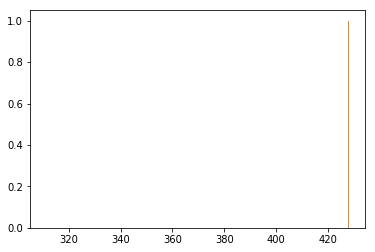

In [53]:
def optimize_price(initial_investment,per_category_investment,inventory,i_pay,mean,customer_buys):
    inital_investment = initial_investment
    per_category_investment = per_category_investment 
    print('INVESTED IN EACH OF THE 10 CATEGORIES ${:.2f}'.format(per_category_investment))
    mean = mean 
    i_pay = i_pay
    num_categories = 10
    invent = i_pay *inventory
    current_spend = inital_investment  - per_category_investment
    print('UNUSED FUNDS: {}'.format(current_spend))
    
    profit_target = (current_spend *1.5)/26 #biweekly
    returns = profit_target/current_spend
    new_price = mean*returns+i_pay
    price_range = mean-new_price
    optimal_price = mean - price_range
    print('IF I PAY ${:.2f} PER ITEM , AND MY STARTING INVESTMENT IS: ${:.2f} \nWITH AN INVENTORY OF: {} ITEMS AT AN AVERAGE PRICE OF ${:.2f}'.format(i_pay,inital_investment,inventory,mean))
    print('WE WILL WANT A PROFIT TARGET OF: ${:.2f} BIWEEKLY FOR A 1.5 PERCENT RETURN, \nMY RETURNS WILL BE: ${:.2f} PER DOLLAR \nWHILE THE ITEM WILL HAVE A NEW PRICE OF: ${:.2f} \nWITH A PRICE RANGE OF: ${:.2f}'.format(profit_target,returns,new_price,price_range))
    print('OPTIMAL PRICE: ${:.2f}'.format(optimal_price))
#     print('PROFIT IF STRATEGY FOLLWED WILL BE: ${:.2f} \nFOR ITEMS IN EACH OF THE TEN CATEGORIES THAT COST: ${}'.format(returns*,mean))
#     print('ANNUAL PROFIT: {:.2f}'.format(inital_investment*returns*26))
    cus_buys = customer_buys
    customer_buys = customer_buys * optimal_price
    if customer_buys >= profit_target:
        print('THE CUSTOMER BOUGHT {} ITEMS'.format(cus_buys))
        print('SINCE THE CUSTOMER BOUGHT THIS AMOUNT OF ITEMS YOU ARE ${:.2f} ABOVE THE PROFIT TARGET'.format(customer_buys-profit_target))
        print('CONGRATULATIONS YOU REACHED THE BIWEEKLY PROFIT TARGET ${:.2f}'.format(customer_buys+returns))
        can_buy = (customer_buys +returns)/cus_buys
        print('YOU CAN BUY {} ITEMS AT WHOLESALE PRICE OF ${:.2f}'.format(can_buy,i_pay))
        print('YOU GAINED A PROFIT OF ${:.2f} AFTER THE PURCHASE OF {} ITEMS'.format(customer_buys*returns,cus_buys))
        plt.hist(profit_target)
#     plt.scatter(customer_buys,optimal_price,price_range,new_price)
        plt.hist(customer_buys)
    elif customer_buys <= profit_target:
        print('THE CUSTOMER BOUGHT {} ITEMS'.format(cus_buys))
        print('SINCE THE CUSTOMER BOUGHT THIS AMOUNT OF ITEMS YOU ARE ${:.2f} AWAY FROM THE PROFIT TARGET  OF ${:.2f}'.format(profit_target-customer_buys,profit_target))
        print('PROFIT TARGET NOT YET HIT')
        can_buy =(customer_buys +returns)/cus_buys
        print('YOU CAN BUY {} ITEMS AT WHOLESALE PRICE OF ${:.2f}'.format(can_buy,i_pay))
        print('YOU GAINED A PROFIT OF ${:.2f} AFTER THE PURCHASE OF {} ITEMS'.format(customer_buys*returns,cus_buys))
        plt.hist(profit_target)
#     plt.scatter(customer_buys,optimal_price,price_range,new_price)
        plt.hist(customer_buys*invent)
        
    return #i_pay,mean,current_spend,profit_target,returns,new_price
optimize_price(6000,600,20,20,24,20)

    